In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
df = pd.read_csv('japan.csv')
df.drop(columns=['country','model'],inplace = True)

In [49]:
df.odometer = df.odometer.apply(np.sqrt)
df.price = df.price.apply(np.sqrt)

In [50]:
df.title_status = np.where(df.title_status=="parts only","salvage",df.title_status)

In [51]:
lables = ['missing','lien','salvage','rebuilt','clean']
nominal = np.arange(0,5,step = 1)
df.title_status = df.title_status.replace(lables,nominal)
df.title_status = df.title_status.astype(np.int32)
df.transmission = np.where(df.transmission=="automatic",1,0)

In [52]:
df= pd.get_dummies(df,prefix="",prefix_sep="")

In [53]:
X = df.drop(columns=['price'])
y = df.price

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lm = LinearRegression().fit(X_train,y_train)

In [58]:
lm.score(X_test,y_test)

0.8667441025919065

In [59]:
lm.score(X_train,y_train)

0.8691662478998867

In [60]:
columns = X.columns

In [61]:
from sklearn.metrics import r2_score

In [62]:
r2_score(y_train**2,lm.predict(X_train)**2)

0.8724123997312698

In [63]:
r2_score(y_test**2,lm.predict(X_test)**2)

0.8722031433334423

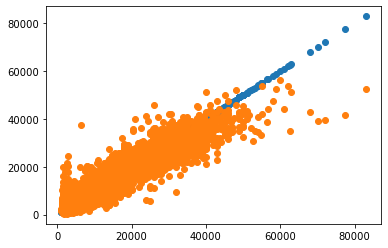

In [42]:
plt.scatter(y_test**2,y_test**2)
plt.scatter(y_test**2,lm.predict(X_test)**2)

In [64]:
columns = X.columns

In [65]:
columns

Index(['year', 'cylinders', 'odometer', 'title_status', 'transmission',
       'engine_size', 'hp', 'acura', 'honda', 'infiniti', 'lexus', 'mazda',
       'mitsubishi', 'nissan', 'subaru', 'toyota', 'diesel', 'electric', 'gas',
       'hybrid', 'SUV', 'convertible', 'coupe', 'crew cab', 'crossover',
       'hatchback', 'mini-van', 'offroad', 'pickup', 'sedan', 'wagon'],
      dtype='object')

In [85]:
def predict(year,cyl,odometer,title_status,engine,hp,manufacturer,fuel,transmission,body):
    zeros = np.zeros(len(columns))
    title_status_dict = {'missing':0,'lien':1,'salvage':2,'rebuilt':3,'clean':4}
    zeros[0] = year
    zeros[1] = cyl
    zeros[2] = np.sqrt(odometer)
    zeros[3] = title_status_dict[title_status]
    zeros[4] = np.where(transmission=="automatic",1,0)
    zeros[5] = engine
    zeros[6] = hp
    
    
    manufacturer_idx = np.where(manufacturer == columns)[0][0]
    fuel_idx = np.where(fuel == columns)[0][0]
    type_body_idx = np.where(body == columns)[0][0]
    
      
    if manufacturer_idx >= 0:
        zeros[manufacturer_idx] = 1
        
         
    if fuel_idx >=0:
        zeros[fuel_idx] = 1
        
        
    if type_body_idx>=0:
        zeros[type_body_idx] = 1
        
    zeros = np.asarray([zeros])


    return lm.predict(zeros)**2

In [88]:
predict(2018,6,70000,'clean',3.5,290,'acura','gas','automatic','sedan')

C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20748.17197758])

In [95]:
predict(2021,4,42240,'clean',2.0,268,'subaru','gas','manual','sedan')

C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27897.53455198])